# Temperature Data Extraction

In [57]:
import pandas as pd
import numpy as np
import datetime

In [58]:
history_datapath = "Tamjeed_Data_Daily.csv"
modern_datapath = "Tamjeed_Data_Daily_2020.csv"

## historical data extraction

In [3]:
history_df = pd.read_csv(history_datapath)
history_df

,Latitude,Longitude,Date,Location,Temperature
0,41.501299,-74.620909,19970101,New York,280.072937
1,41.501299,-74.620909,19970102,New York,279.577087
2,41.501299,-74.620909,19970103,New York,279.534683
3,41.501299,-74.620909,19970104,New York,278.149521
4,41.501299,-74.620909,19970105,New York,277.211990
...,...,...,...,...,...
33591,30.905244,-97.365594,20191226,Texas,290.303116
33592,30.905244,-97.365594,20191227,Texas,291.104706
33593,30.905244,-97.365594,20191228,Texas,287.258270
33594,30.905244,-97.365594,20191229,Texas,287.205383


In [5]:
modern_df = pd.read_csv(modern_datapath)
modern_df

,Latitude,Longitude,Date,Location,Temperature
0,41.501299,-74.620909,20200101,New York,279.440994
1,41.501299,-74.620909,20200102,New York,281.707596
2,41.501299,-74.620909,20200103,New York,284.180588
3,41.501299,-74.620909,20200104,New York,284.118439
4,41.501299,-74.620909,20200105,New York,283.047592
...,...,...,...,...,...
475,30.905244,-97.365594,20200425,Texas,299.324219
476,30.905244,-97.365594,20200426,Texas,303.463104
477,30.905244,-97.365594,20200427,Texas,306.069901
478,30.905244,-97.365594,20200428,Texas,303.523727


In [37]:
region_history = history_df.loc[history_df["Location"] == "New York"]

In [38]:
region_history

,Latitude,Longitude,Date,Location,Temperature
0,41.501299,-74.620909,19970101,New York,280.072937
1,41.501299,-74.620909,19970102,New York,279.577087
2,41.501299,-74.620909,19970103,New York,279.534683
3,41.501299,-74.620909,19970104,New York,278.149521
4,41.501299,-74.620909,19970105,New York,277.211990
...,...,...,...,...,...
8394,41.501299,-74.620909,20191226,New York,285.123428
8395,41.501299,-74.620909,20191227,New York,283.247284
8396,41.501299,-74.620909,20191228,New York,282.375458
8397,41.501299,-74.620909,20191229,New York,279.570618


In [39]:
region_hist_temp = region_history["Temperature"]

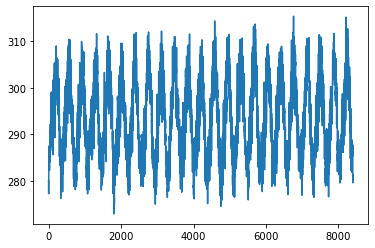

In [40]:
region_hist_temp.plot()

In [72]:
weeks_before = 2

original_start = 19971004
start_datetime = datetime.datetime.strptime(str(original_start), "%Y%m%d")
new_start_datetime = start_datetime - datetime.timedelta(days=(7*weeks_before))
startdate = int(new_start_datetime.strftime("%Y%m%d"))
startdate_int64 = np.int64(startdate)
regionstartdate = region_history.loc[region_history["Date"] == startdate_int64]

original_end = 20190928
end_datetime = datetime.datetime.strptime(str(original_end), "%Y%m%d")
new_end_datetime = end_datetime - datetime.timedelta(days=(7*weeks_before))
enddate = int(new_end_datetime.strftime("%Y%m%d"))
enddate_int64 = np.int64(enddate)
regionenddate = region_history.loc[region_history["Date"] == enddate_int64]

In [74]:
regionenddate

,Latitude,Longitude,Date,Location,Temperature
8291,41.501299,-74.620909,20190914,New York,301.531723


In [75]:
region_history_timeline = region_history.iloc[regionstartdate.index[0]:regionenddate.index[0]+1]

In [76]:
region_history_timeline_weekly = region_history_timeline.iloc[::7]
region_history_timeline_weekly

,Latitude,Longitude,Date,Location,Temperature
262,41.501299,-74.620909,19970920,New York,299.803452
269,41.501299,-74.620909,19970927,New York,297.954224
276,41.501299,-74.620909,19971004,New York,297.251862
283,41.501299,-74.620909,19971011,New York,292.976410
290,41.501299,-74.620909,19971018,New York,296.399796
...,...,...,...,...,...
8263,41.501299,-74.620909,20190817,New York,308.913162
8270,41.501299,-74.620909,20190824,New York,305.561066
8277,41.501299,-74.620909,20190831,New York,303.969116
8284,41.501299,-74.620909,20190907,New York,300.895630


In [77]:
region_temperature_data = region_history_timeline_weekly["Temperature"]

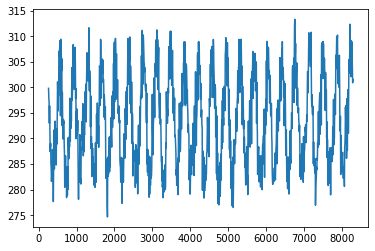

In [78]:
region_temperature_data.plot()

## modern temperature extraction